Compare the different runs that we have

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from moSlicer import MoSlicer
import moMetrics as MoMetrics
from moSummaryMetrics import ValueAtHMetric
import moPlots as moPlots
import moMetricBundle as mmb
import lsst.sims.maf.plots as plots

In [6]:
nObsPerNight=2

In [7]:
runs = ['enigma_1189', 'ops2_1094', 'enigma_1257', 'enigma_1258', 'enigma_1259']
orbitfile = 'pha20141031.des'
metadata = 'PHAS with camera footprint'
outDir = '5runs'
completeList = []
for runName in runs:
    obsfile = runName+'_out.txt'
    mos = MoSlicer(orbitfile, Hrange=np.arange(13, 26, 0.5))
    mos.readObs(obsfile)
    metric = MoMetrics.DiscoveryChancesMetric(nObsPerNight=nObsPerNight)
    slicer = mos
    pandasConstraint = None
    discovery = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                   runName=runName, metadata=metadata)

    bg = mmb.MoMetricBundleGroup({0:discovery}, outDir=outDir)
    bg.runAll()
    #bg.plotAll(closefigs=False)
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    completeList.append(completeness)

Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.


1

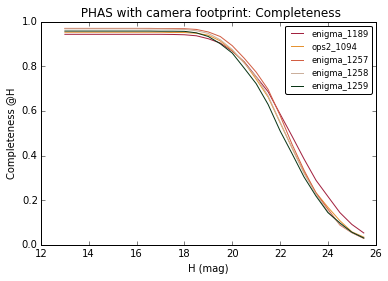

In [8]:
ph = plots.PlotHandler(outDir=outDir)
ph.setMetricBundles(completeList)
ph.plot(plotFunc=moPlots.MetricVsH())

Wow, so if we only need 2 obsPerNight, there's pretty minimal difference between all the runs. Try it again but require 3 observaions per night to get a tracklet.

Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.


1

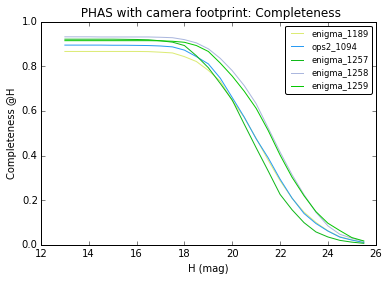

In [11]:
nObsPerNight=3
completeList = []
for runName in runs:
    obsfile = runName+'_out.txt'
    mos = MoSlicer(orbitfile, Hrange=np.arange(13, 26, 0.5))
    mos.readObs(obsfile)
    metric = MoMetrics.DiscoveryChancesMetric(nObsPerNight=nObsPerNight)
    slicer = mos
    pandasConstraint = None
    discovery = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                   runName=runName, metadata=metadata)

    bg = mmb.MoMetricBundleGroup({0:discovery}, outDir=outDir)
    bg.runAll()
    #bg.plotAll(closefigs=False)
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    completeList.append(completeness)
ph = plots.PlotHandler(outDir=outDir)
ph.setMetricBundles(completeList)
ph.plot(plotFunc=moPlots.MetricVsH())